## TEWA 1 tutorial

regression modelling

*   Categorical predictors
*   Interactions
*   Training and test set
*   Reguralized regression: Ridge and lasso



### import libraries


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import io,stats,linalg
import pandas as pd
from sklearn.linear_model import LinearRegression, Lasso, Ridge

### load data to workspace

In [3]:
df=pd.read_csv('data/kidiq.csv')
# source: Gelman et al (2021). Regression and other stories

## print data table, explore number of potential predictors, data-set size

In [46]:
y_name = "kid_score"
X_names = ['mom_hs', 'mom_iq', 'mom_work', 'mom_age']

In [5]:
df.shape

(434, 5)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 434 entries, 0 to 433
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   kid_score  434 non-null    int64  
 1   mom_hs     434 non-null    int64  
 2   mom_iq     434 non-null    float64
 3   mom_work   434 non-null    int64  
 4   mom_age    434 non-null    int64  
dtypes: float64(1), int64(4)
memory usage: 17.1 KB


In [10]:
df.describe()

,kid_score,mom_hs,mom_iq,mom_work,mom_age
count,434.000000,434.000000,434.000000,434.000000,434.000000
mean,86.797235,0.785714,100.000000,2.896313,22.785714
std,20.410688,0.410799,15.000000,1.181394,2.701070
min,20.000000,0.000000,71.037405,1.000000,17.000000
25%,74.000000,1.000000,88.660321,2.000000,21.000000
50%,90.000000,1.000000,97.915254,3.000000,23.000000
75%,102.000000,1.000000,110.272742,4.000000,25.000000
max,144.000000,1.000000,138.893106,4.000000,29.000000


In [ ]:
df.mom_work.unique()

array([4, 3, 1, 2])

### Visualize some of the data

(array([  1.,  15.,  30.,  47.,  56., 110., 112.,  51.,   9.,   3.]),
 array([ 20. ,  32.4,  44.8,  57.2,  69.6,  82. ,  94.4, 106.8, 119.2,
        131.6, 144. ]),
 <BarContainer object of 10 artists>)

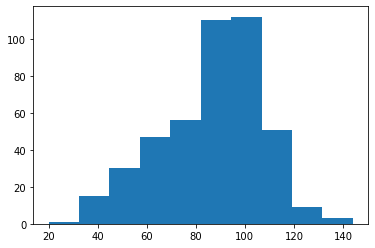

In [20]:
plt.hist(df.kid_score)

(array([15., 55., 77., 72., 68., 46., 41., 27., 22., 11.]),
 array([ 71.03740514,  77.82297523,  84.60854532,  91.39411542,
         98.17968551, 104.9652556 , 111.7508257 , 118.53639579,
        125.32196588, 132.10753598, 138.89310607]),
 <BarContainer object of 10 artists>)

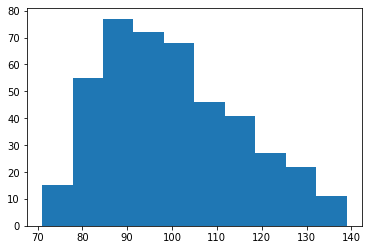

In [31]:
plt.hist(df.mom_iq)

(array([ 16.,  40.,  40.,  52.,  57., 111.,  40.,  36.,  21.,  21.]),
 array([17. , 18.2, 19.4, 20.6, 21.8, 23. , 24.2, 25.4, 26.6, 27.8, 29. ]),
 <BarContainer object of 10 artists>)

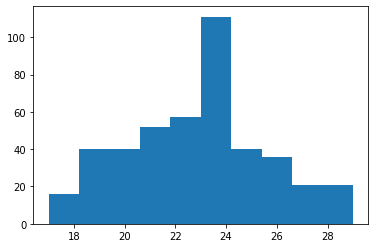

In [32]:
plt.hist(df.mom_age)

(array([ 93., 341.]),
 array([0. , 0.5, 1. ]),
 <BarContainer object of 2 artists>)

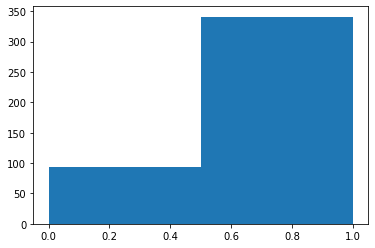

In [30]:
plt.hist(df.mom_hs, bins=2)

(array([ 77.,   0.,   0.,  96.,   0.,   0.,  56.,   0.,   0., 205.]),
 array([1. , 1.3, 1.6, 1.9, 2.2, 2.5, 2.8, 3.1, 3.4, 3.7, 4. ]),
 <BarContainer object of 10 artists>)

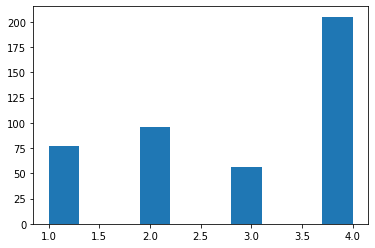

In [44]:
plt.hist(df.mom_work)

In [35]:
df.corr()

,kid_score,mom_hs,mom_iq,mom_work,mom_age
kid_score,1.000000,0.236916,0.448276,0.087528,0.091998
mom_hs,0.236916,1.000000,0.282709,0.253910,0.214528
mom_iq,0.448276,0.282709,1.000000,0.114803,0.091608
mom_work,0.087528,0.253910,0.114803,1.000000,0.135598
mom_age,0.091998,0.214528,0.091608,0.135598,1.000000


<AxesSubplot:>

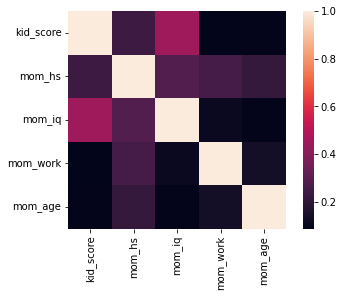

In [34]:
import seaborn as sns

sns.heatmap(df.corr(), square = True)

<AxesSubplot:xlabel='mom_hs', ylabel='kid_score'>

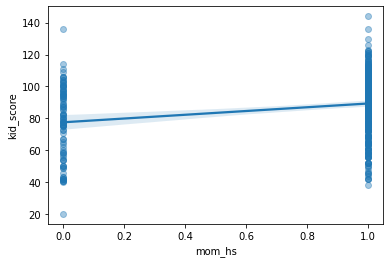

In [74]:
sns.regplot(data = df, x = "mom_hs", y = y_name, scatter_kws = {"alpha": 0.4})

<AxesSubplot:xlabel='mom_iq', ylabel='kid_score'>

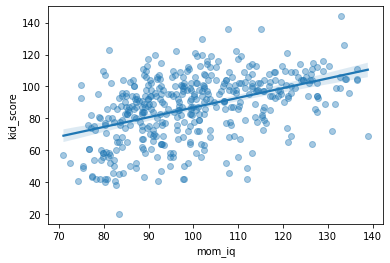

In [73]:
sns.regplot(data = df, x = "mom_iq", y = y_name, scatter_kws = {"alpha": 0.4})

<AxesSubplot:xlabel='mom_age', ylabel='kid_score'>

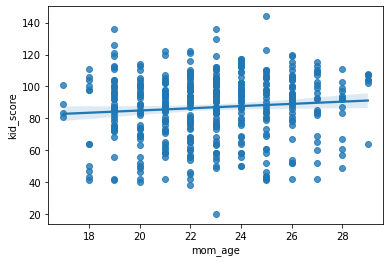

In [50]:
sns.regplot(data = df, x = "mom_age", y = y_name)

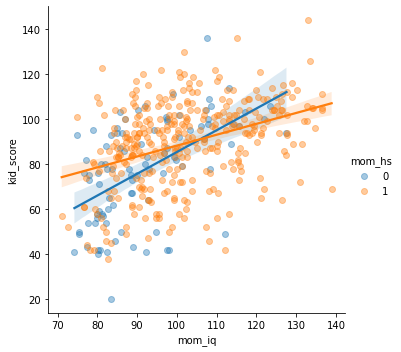

In [70]:
sns.lmplot(x=X_names[1], 
           y=y_name, 
           hue="mom_hs",
           data=df, scatter_kws = {"alpha": 0.4})

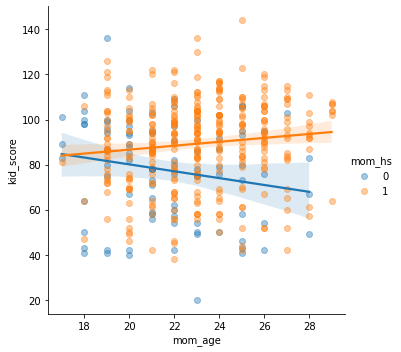

In [69]:
sns.lmplot(x=X_names[3], 
           y=y_name, 
           hue="mom_hs",
           data=df, scatter_kws = {"alpha": 0.4})

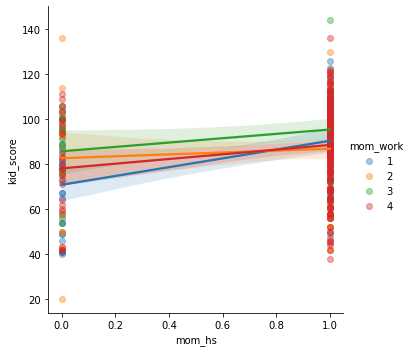

In [68]:
sns.lmplot(x=X_names[0], 
           y=y_name, 
           hue="mom_work",
           data=df, scatter_kws = {"alpha": 0.4})

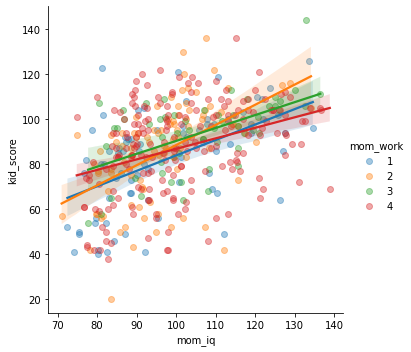

In [67]:
sns.lmplot(x=X_names[1], 
           y=y_name, 
           hue="mom_work",
           data=df, scatter_kws = {"alpha": 0.4})

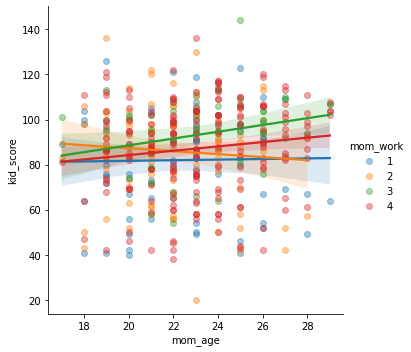

In [66]:
sns.lmplot(x=X_names[3], 
           y=y_name, 
           hue="mom_work",
           data=df, scatter_kws = {"alpha": 0.4})

## fit a linear regression, using two predictors 'mom_hs' and 'mom_iq' 

,intercept,mom_hs,mom_iq,mom_work,mom_age
0,1,1,121.117529,4,27
1,1,1,89.361882,4,25
2,1,1,115.443165,4,27
3,1,1,99.449639,3,25
4,1,1,92.745710,4,27
...,...,...,...,...,...
429,1,0,84.877412,4,21
430,1,1,92.990392,4,23
431,1,0,94.859708,2,24
432,1,1,96.856624,2,21


 ### check the predictor weigths, and the score of the model


In [98]:
reg = LinearRegression()
reg.fit(df[X_names], df[y_name])
reg.coef_

array([5.56117805, 0.56208142, 0.13372871, 0.21985986])

In [99]:
reg.intercept_

20.822611703272216

In [100]:
reg.score(df[X_names], df[y_name])

0.21504503560100818

### visualize predictions and true data



In [118]:
y_pred = reg.predict(df[X_names])

Text(0, 0.5, 'kid_score')

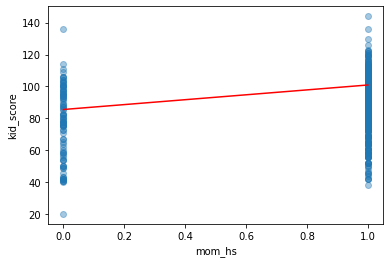

In [139]:
x_name = X_names[0]

plt.plot([df[x_name].min(),df[x_name].max()],[y_pred[df[x_name].argmin()], y_pred[df[x_name].argmax()]], c = "red")
plt.scatter(df[x_name],df[y_name], alpha = 0.4)
plt.xlabel(x_name)
plt.ylabel(y_name)

Text(0, 0.5, 'kid_score')

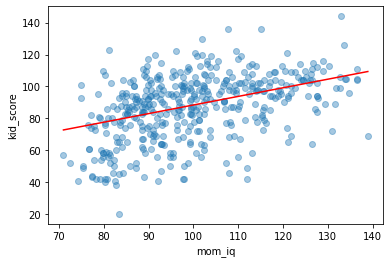

In [135]:
x_name = X_names[1]

plt.plot([df[x_name].min(),df[x_name].max()],[y_pred[df[x_name].argmin()], y_pred[df[x_name].argmax()]], c = "red")
plt.scatter(df[x_name],df[y_name], alpha = 0.4)
plt.xlabel(x_name)
plt.ylabel(y_name)

Text(0, 0.5, 'kid_score')

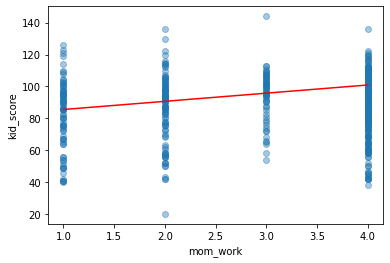

In [136]:
x_name = X_names[2]

plt.plot([df[x_name].min(),df[x_name].max()],[y_pred[df[x_name].argmin()], y_pred[df[x_name].argmax()]], c = "red")
plt.scatter(df[x_name],df[y_name], alpha = 0.4)
plt.xlabel(x_name)
plt.ylabel(y_name)

Text(0, 0.5, 'kid_score')

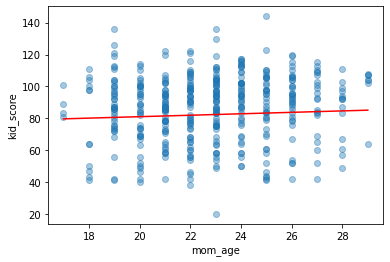

In [137]:
x_name = X_names[3]

plt.plot([df[x_name].min(),df[x_name].max()],[y_pred[df[x_name].argmin()], y_pred[df[x_name].argmax()]], c = "red")
plt.scatter(df[x_name],df[y_name], alpha = 0.4)
plt.xlabel(x_name)
plt.ylabel(y_name)

## model with interaction

make a new design matrix, that included a column for the interaction between momhs and mom_iq

fit the model and visualize the model prediciton

In [146]:
X_interact = df[X_names]

X_interact["mom_hs_x_mom_iq"] = X_interact["mom_hs"] * X_interact["mom_iq"]

In [147]:
reg = LinearRegression()
reg.fit(X_interact, df[y_name])
reg.coef_

array([ 5.27751085e+01,  9.84555501e-01,  3.97964181e-02,  3.50821328e-01,
       -5.05725362e-01])

In [148]:
reg.intercept_

-20.61891478636595

In [149]:
reg.score(X_interact, df[y_name])

0.23214827469030974

 ## Training and test set

seprate the X and Y data, into an 80% training and 20% test set using indexing
for now, it is okay, just to take the first 80% of data as training and the last 20% as test data  
(this is clearly a wrong approach if the data is ordered)




In [161]:
from sklearn.model_selection import train_test_split

df["mom_hs_x_mom_iq"] = df["mom_hs"] * df["mom_iq"]

df_train, df_test = train_test_split(df, test_size=int(0.2 * len(df)))

## fit the regression model (with interaction term) on the training set, and calculate the score for both the traning and the test sets

In [165]:
reg = LinearRegression()
reg.fit(df_train[X_names + ["mom_hs_x_mom_iq"]], df_train[y_name])
print(reg.coef_)
print(reg.intercept_)

[53.53532661  0.99989694 -0.97374196  0.69552066 -0.50688212]
-28.202133857294825


## Mean Centering and standardization

1. Mean center your data (make a new design matrix for this), and fit and score the model again.

2. Standardize your data, and fit again the model with interaction.
see how the obtained coefficients and score change



In [166]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [175]:
scaler.fit_transform(df[X_names])

array([[ 0.52223297,  1.40945998,  0.93530251,  1.56202909],
       [ 0.52223297, -0.71002636,  0.93530251,  0.82072715],
       [ 0.52223297,  1.03073249,  0.93530251,  1.56202909],
       ...,
       [-1.91485422, -0.3430816 , -0.75956717,  0.45007618],
       [ 0.52223297, -0.20980024, -0.75956717, -0.66187673],
       [ 0.52223297, -0.58378386, -0.75956717,  0.82072715]])

## Regularized regression


test Lasso and Ridge regression on the test and training data from above

see how the score changes, but also how the regression weights (Betas) are influenced.

note: ridge and lasso work well with standardized data.


## Systematic exploration of Lasso and Ridge

change the Regularization strength alpha systematically for different values.
see how this influnces the obtained scores and weigths (both for Lasso and Ridge)


Visualize the result of this investigation





to make more general conclusions, we would need to repeat the training - test serpation mulitple times randomly, and integrate the behavior of lasso and ridge across these mulitple divisions